In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install jinja2==3.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 30.6 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.1 which is incompatible.


In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_excel("/content/drive/MyDrive/Travel_Ins.xlsx")
df

Mounted at /content/drive


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [6]:
df.shape

(63326, 11)

In [10]:
from pycaret.utils import version
version()

'2.3.10'

In [13]:
from pycaret.classification import *
clf1 = setup(df, target = 'Claim', session_id=786)

,Description,Value
0,session_id,786
1,Target,Claim
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(63326, 11)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Claim',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9852,0.8157,0.0000,0.0000,0.0000,-0.0000,-0.0002,13.048
ridge,Ridge Classifier,0.9852,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.132
ada,Ada Boost Classifier,0.9852,0.8095,0.0000,0.0000,0.0000,-0.0000,-0.0002,2.487
dummy,Dummy Classifier,0.9852,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.045
lightgbm,Light Gradient Boosting Machine,0.9851,0.8117,0.0031,0.1500,0.0060,0.0056,0.0199,0.623
knn,K Neighbors Classifier,0.9848,0.5853,0.0138,0.2876,0.0258,0.0243,0.0565,2.477
gbc,Gradient Boosting Classifier,0.9847,0.8202,0.0000,0.0000,0.0000,-0.0010,-0.0026,9.832
rf,Random Forest Classifier,0.9833,0.6858,0.0123,0.0903,0.0212,0.0174,0.0271,5.325
svm,SVM - Linear Kernel,0.9832,0.0000,0.0062,0.0373,0.0096,0.0066,0.0102,0.942
et,Extra Trees Classifier,0.9808,0.6453,0.0169,0.0508,0.0252,0.0180,0.0209,8.192


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9853,0.7908,0.0,0.0,0.0,0.0000,0.0000
1,0.9853,0.8247,0.0,0.0,0.0,0.0000,0.0000
2,0.9853,0.7535,0.0,0.0,0.0,0.0000,0.0000
3,0.9853,0.8208,0.0,0.0,0.0,0.0000,0.0000
4,0.9851,0.8192,0.0,0.0,0.0,0.0000,0.0000
5,0.9851,0.8442,0.0,0.0,0.0,0.0000,0.0000
6,0.9849,0.8072,0.0,0.0,0.0,-0.0004,-0.0018
7,0.9851,0.8574,0.0,0.0,0.0,0.0000,0.0000
8,0.9853,0.8135,0.0,0.0,0.0,0.0000,0.0000


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9704,0.5295,0.0769,0.0658,0.0709,0.0560,0.0562
1,0.9704,0.5594,0.1231,0.0976,0.1088,0.0940,0.0947
2,0.9695,0.5515,0.1231,0.0930,0.1060,0.0908,0.0917
3,0.9680,0.5136,0.0462,0.0361,0.0405,0.0245,0.0247
4,0.9723,0.5298,0.0606,0.0615,0.0611,0.0470,0.0470
5,0.9693,0.5214,0.0455,0.0395,0.0423,0.0267,0.0268
6,0.9682,0.5057,0.0303,0.0253,0.0276,0.0116,0.0116
7,0.9768,0.5398,0.0909,0.1224,0.1043,0.0928,0.0939
8,0.9718,0.5455,0.1077,0.0946,0.1007,0.0865,0.0866


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [16]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9655,0.7886,0.1846,0.1071,0.1356,0.1192,0.1239
1,0.9614,0.8213,0.2615,0.1214,0.1659,0.1488,0.1604
2,0.9605,0.7329,0.1077,0.0565,0.0741,0.0559,0.0590
3,0.9621,0.8198,0.2000,0.1008,0.1340,0.1168,0.1240
4,0.9650,0.8171,0.1818,0.1062,0.1341,0.1175,0.1219
5,0.9623,0.8428,0.2879,0.1367,0.1854,0.1686,0.1810
6,0.9598,0.7974,0.1818,0.0882,0.1188,0.1008,0.1077
7,0.9662,0.8637,0.1667,0.1038,0.1279,0.1116,0.1149
8,0.9653,0.7986,0.2462,0.1322,0.1720,0.1559,0.1638


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [17]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9853,0.5,0.0,0.0,0.0,0.0,0.0
1,0.9853,0.5,0.0,0.0,0.0,0.0,0.0
2,0.9853,0.5,0.0,0.0,0.0,0.0,0.0
3,0.9853,0.5,0.0,0.0,0.0,0.0,0.0
4,0.9851,0.5,0.0,0.0,0.0,0.0,0.0
5,0.9851,0.5,0.0,0.0,0.0,0.0,0.0
6,0.9851,0.5,0.0,0.0,0.0,0.0,0.0
7,0.9851,0.5,0.0,0.0,0.0,0.0,0.0
8,0.9853,0.5,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.4, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [18]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9741,0.7601,0.1077,0.1094,0.1085,0.0954,0.0954
1,0.9700,0.7738,0.2308,0.1531,0.1840,0.1694,0.1731
2,0.9621,0.6652,0.1077,0.0598,0.0769,0.0592,0.0619
3,0.9711,0.7397,0.1692,0.1294,0.1467,0.1322,0.1335
4,0.9720,0.7610,0.1364,0.1184,0.1268,0.1126,0.1129
5,0.9714,0.8086,0.1818,0.1412,0.1589,0.1446,0.1458
6,0.9664,0.7402,0.1667,0.1048,0.1287,0.1124,0.1156
7,0.9664,0.7235,0.1515,0.0971,0.1183,0.1020,0.1047
8,0.9731,0.7702,0.2154,0.1707,0.1905,0.1770,0.1782


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [19]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.4, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')


In [20]:
print(tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001)


In [21]:
tuned2_dt = tune_model(dt, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9853,0.7639,0.0,0.0,0.0,0.0,0.0
1,0.9853,0.8153,0.0,0.0,0.0,0.0,0.0
2,0.9853,0.7327,0.0,0.0,0.0,0.0,0.0
3,0.9853,0.7936,0.0,0.0,0.0,0.0,0.0
4,0.9851,0.7805,0.0,0.0,0.0,0.0,0.0
5,0.9851,0.8042,0.0,0.0,0.0,0.0,0.0
6,0.9851,0.7785,0.0,0.0,0.0,0.0,0.0
7,0.9851,0.8313,0.0,0.0,0.0,0.0,0.0
8,0.9853,0.7757,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [22]:
tuned2_lda = tune_model(lda, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9682,0.7963,0.1846,0.1200,0.1455,0.1300,0.1331
1,0.9632,0.8203,0.2615,0.1288,0.1726,0.1560,0.1663
2,0.9612,0.7438,0.1077,0.0579,0.0753,0.0573,0.0602
3,0.9644,0.8083,0.2000,0.1092,0.1413,0.1247,0.1307
4,0.9662,0.8226,0.1818,0.1111,0.1379,0.1217,0.1256
5,0.9646,0.8490,0.2727,0.1417,0.1865,0.1703,0.1799
6,0.9621,0.8033,0.1818,0.0952,0.1250,0.1076,0.1135
7,0.9668,0.8549,0.1970,0.1215,0.1503,0.1343,0.1384
8,0.9675,0.8023,0.2308,0.1376,0.1724,0.1569,0.1624


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0001,
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [23]:
bagged_lda = ensemble_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9666,0.7830,0.1846,0.1121,0.1395,0.1235,0.1276
1,0.9626,0.8185,0.2615,0.1259,0.1700,0.1532,0.1641
2,0.9614,0.7353,0.1077,0.0583,0.0757,0.0578,0.0606
3,0.9635,0.8175,0.1692,0.0924,0.1196,0.1025,0.1075
4,0.9659,0.8168,0.1818,0.1101,0.1371,0.1208,0.1248
5,0.9614,0.8414,0.2727,0.1277,0.1739,0.1568,0.1688
6,0.9601,0.7936,0.1667,0.0827,0.1106,0.0925,0.0985
7,0.9666,0.8596,0.1515,0.0980,0.1190,0.1028,0.1054
8,0.9653,0.8006,0.2462,0.1322,0.1720,0.1559,0.1638


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(n_components=None,
                                                            priors=None,
                                                            shrinkage=None,
                                                            solver='svd',
                                                            store_covariance=False,
                                                            tol=0.0001),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=786, verbose=0,
                  warm_start=False)
INFO:logs:ensemble_model() succesfully completed......................................


In [26]:
dt = create_model('dt', verbose=False)
lda = create_model('lda', verbose=False)
nb = create_model('nb', verbose=False)
et = create_model('et', verbose=False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=dt, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decision Tree Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26


In [32]:
blender = blend_models(estimator_list=[dt,lda,nb], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9538,0.7800,0.2308,0.0882,0.1277,0.1088,0.1222
1,0.9483,0.7912,0.3692,0.1132,0.1733,0.1543,0.1837
2,0.9472,0.7142,0.2000,0.0667,0.1000,0.0798,0.0928
3,0.9483,0.8175,0.2154,0.0729,0.1089,0.0890,0.1031
4,0.9544,0.8077,0.2424,0.0952,0.1368,0.1179,0.1317
5,0.9481,0.8434,0.3333,0.1058,0.1606,0.1412,0.1665
6,0.9456,0.7840,0.1970,0.0647,0.0974,0.0767,0.0896
7,0.9580,0.8690,0.2424,0.1053,0.1468,0.1287,0.1406
8,0.9540,0.8086,0.3385,0.1202,0.1774,0.1592,0.1822


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                  

In [33]:
blender.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=786, splitter='best'),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 GaussianNB(priors=None, var_smoothing=1e-09)]

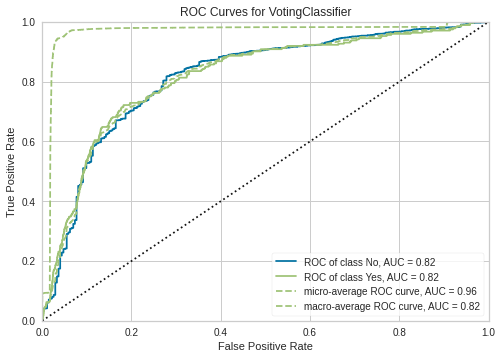

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(blender)

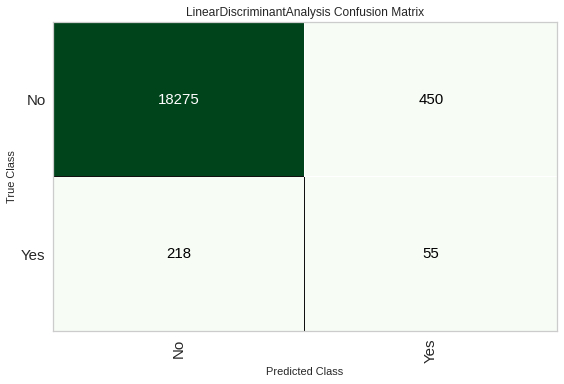

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(lda, plot = 'confusion_matrix')

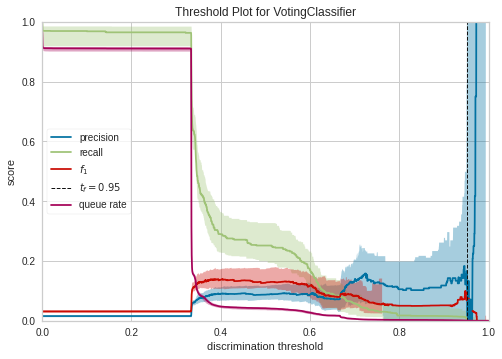

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(blender, plot = 'threshold')

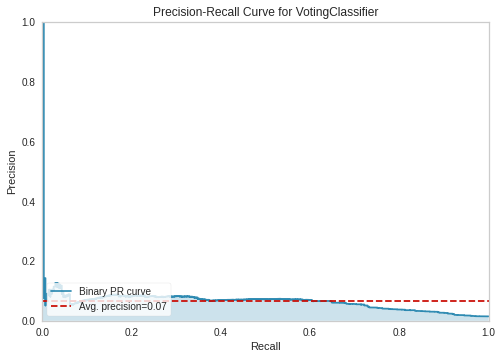

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(blender, plot = 'pr')

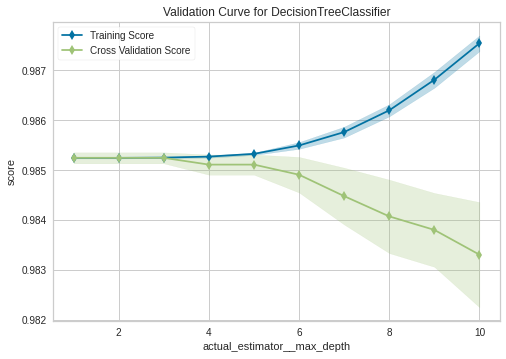

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(dt, plot = 'vc')

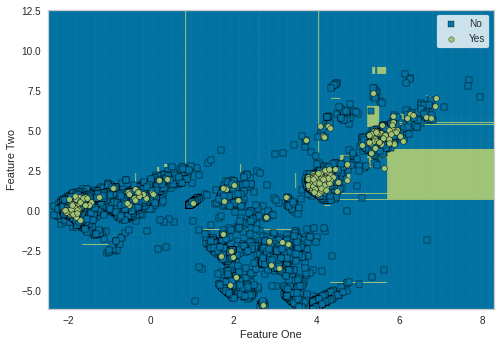

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(dt, plot = 'boundary')

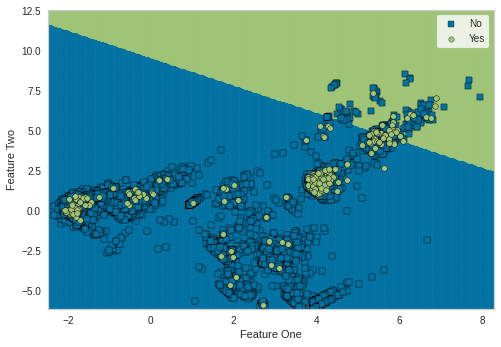

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [43]:
plot_model(lda, plot = 'boundary')

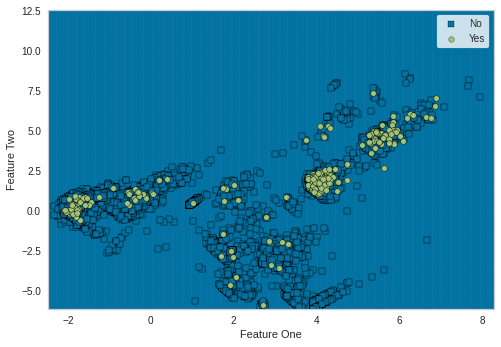

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
plot_model(tuned_dt, plot = 'boundary')